In [106]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
#from pandas.plotting import table
%matplotlib inline
#sns.set(style='white', color_codes = True)
from operator import itemgetter
from matplotlib import rc

In [107]:
initial = pd.read_csv('C:/users/rustym/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [108]:
ps = initial[["Date", "Post patch?", "Post patch pipette R", "PCR cycles", "SM_QC_PF", "Bad dates"]]
#ps.dropna(subset = ["SM_QC_PF", "Post patch?"], inplace = True)
ps.dropna(subset = ["Post patch?"], inplace = True)
#ps["User"] = ps["User"].astype("category")
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps = ps[ps["Bad dates"] != 'x']
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["PCR cycles"] == 21]
ps = ps.drop('Bad dates', 1)
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
#ps["PCR cycles"].value_counts()
#ps['Post patch?'].value_counts()
#ps.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [109]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no

In [110]:
nuc = nucleated(ps)
nuc["post patch class"] = "a.Nucleated"
part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "b.Partial nucleated"
out_out = outside_out(ps)
out_out["post patch class"] = "c.Outside out"
noSeal = no_seal(ps)
noSeal["post patch class"] = "d.No seal"

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [111]:
frames = [nuc, part_nuc, out_out, noSeal]
result = pd.concat(frames)
result.head()

,Date,Post patch?,Post patch pipette R,PCR cycles,SM_QC_PF,post patch class
1637,2017-04-19,Nucleated,NaN,21.0,pass,a.Nucleated
1639,2017-04-19,Nucleated,NaN,21.0,pass,a.Nucleated
1641,2017-04-19,Nucleated,NaN,21.0,pass,a.Nucleated
1654,2017-04-20,Nucleated,NaN,21.0,pass,a.Nucleated
1663,2017-04-20,Nucleated,NaN,21.0,pass,a.Nucleated


In [112]:
ps2 = result.drop('Date',1)
ps2 = ps2.drop('Post patch pipette R',1)
ps2 = ps2.drop('PCR cycles',1)
ps2 = ps2.drop('SM_QC_PF',1)
ps2.head()

,Post patch?,post patch class
1637,Nucleated,a.Nucleated
1639,Nucleated,a.Nucleated
1641,Nucleated,a.Nucleated
1654,Nucleated,a.Nucleated
1663,Nucleated,a.Nucleated


In [113]:
pp_cnt = ps2.groupby(['post patch class']).count()
pp_cnt.reset_index()
pp_cnt['Post patch?'] = pp_cnt['Post patch?'].astype(float)
pp_cnt

,Post patch?
post patch class,
a.Nucleated,1084.0
b.Partial nucleated,294.0
c.Outside out,151.0
d.No seal,780.0


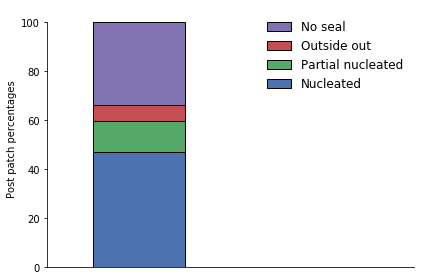

In [198]:
pp_cnts = list(pp_cnt['Post patch?'])
total = float(sum(pp_cnts))
pp_pcts = [(x / total*100) for x in pp_cnts]
total
pp_pcts
n = pp_pcts[0]
p = pp_pcts[1]
o = pp_pcts[2]
no = pp_pcts[3]

fig, ax = plt.subplots(1)
index = 1
barWidth = 0.10
names = ['Nucleated', 'Partial nucleated', 'Outside out', 'No seal']

nuc = plt.bar(index, n, color='#4C72B0', edgecolor='k', width=barWidth)
part = plt.bar(index, p, color='#55A868', edgecolor='k', bottom=n, width=barWidth)
out = plt.bar(index, o, color='#C44E52', edgecolor='k', bottom=[n+p], width=barWidth)
no = plt.bar(index, no, color='#8172B2', edgecolor='k', bottom=[n+p+o], width=barWidth)
#for nu, label in [nuc, total]:
    #ax.text(no.get_x()+no.get_width()/2, 100, total, ha='cneter', va='bottom')
plt.ylabel("Post patch percentages")
#plt.xlabel('none')
axes=plt.gca()
axes.set_xlim(0.9,1.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(0,100)
ax.xaxis.set_visible(False)

#plt.axes().set_aspect('equal', 'datalim')
plt.legend((no,out,part,nuc), ('No seal', 'Outside out', 'Partial nucleated', 'Nucleated'), frameon=False, prop={'size':12})
plt.tight_layout()
plt.savefig('Post_patch_percentages',dpi=300)